In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('C:\\Users\\Almas\\Downloads/Depression.csv')

In [51]:
df.head(100)

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...
94,21,Male,Good,Yes,Sometimes,Yes,Yes,6,4.0,Yes
95,21,Female,Good,Yes,Yes,No,Yes,6,6.0,Yes
96,25,Male,Good,Yes,Sometimes,No,Yes,4,9.0,No
97,21,Male,Good,Yes,No,Sometimes,No,10,23.0,Yes


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   99 non-null     int64  
 1   Gender                                99 non-null     object 
 2   AcademicPerformance                   99 non-null     object 
 3   TakingNoteInClass                     99 non-null     object 
 4   DepressionStatus                      99 non-null     object 
 5   FaceChallangesToCompleteAcademicTask  99 non-null     object 
 6   LikePresentation                      99 non-null     object 
 7   SleepPerDayHours                      99 non-null     int64  
 8   NumberOfFriend                        95 non-null     float64
 9   LikeNewThings                         99 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.9+ KB


In [53]:
df["DepressionStatus"].value_counts()

DepressionStatus
Sometimes    44
Yes          34
No           21
Name: count, dtype: int64

In [54]:
df.describe()

,Age,SleepPerDayHours,NumberOfFriend
count,99.000000,99.000000,95.000000
mean,22.515152,6.717172,16.189474
std,1.560767,1.738169,25.397811
min,20.000000,4.000000,0.000000
25%,21.000000,5.000000,3.000000
50%,23.000000,7.000000,6.000000
75%,24.000000,8.000000,15.000000
max,25.000000,12.000000,100.000000


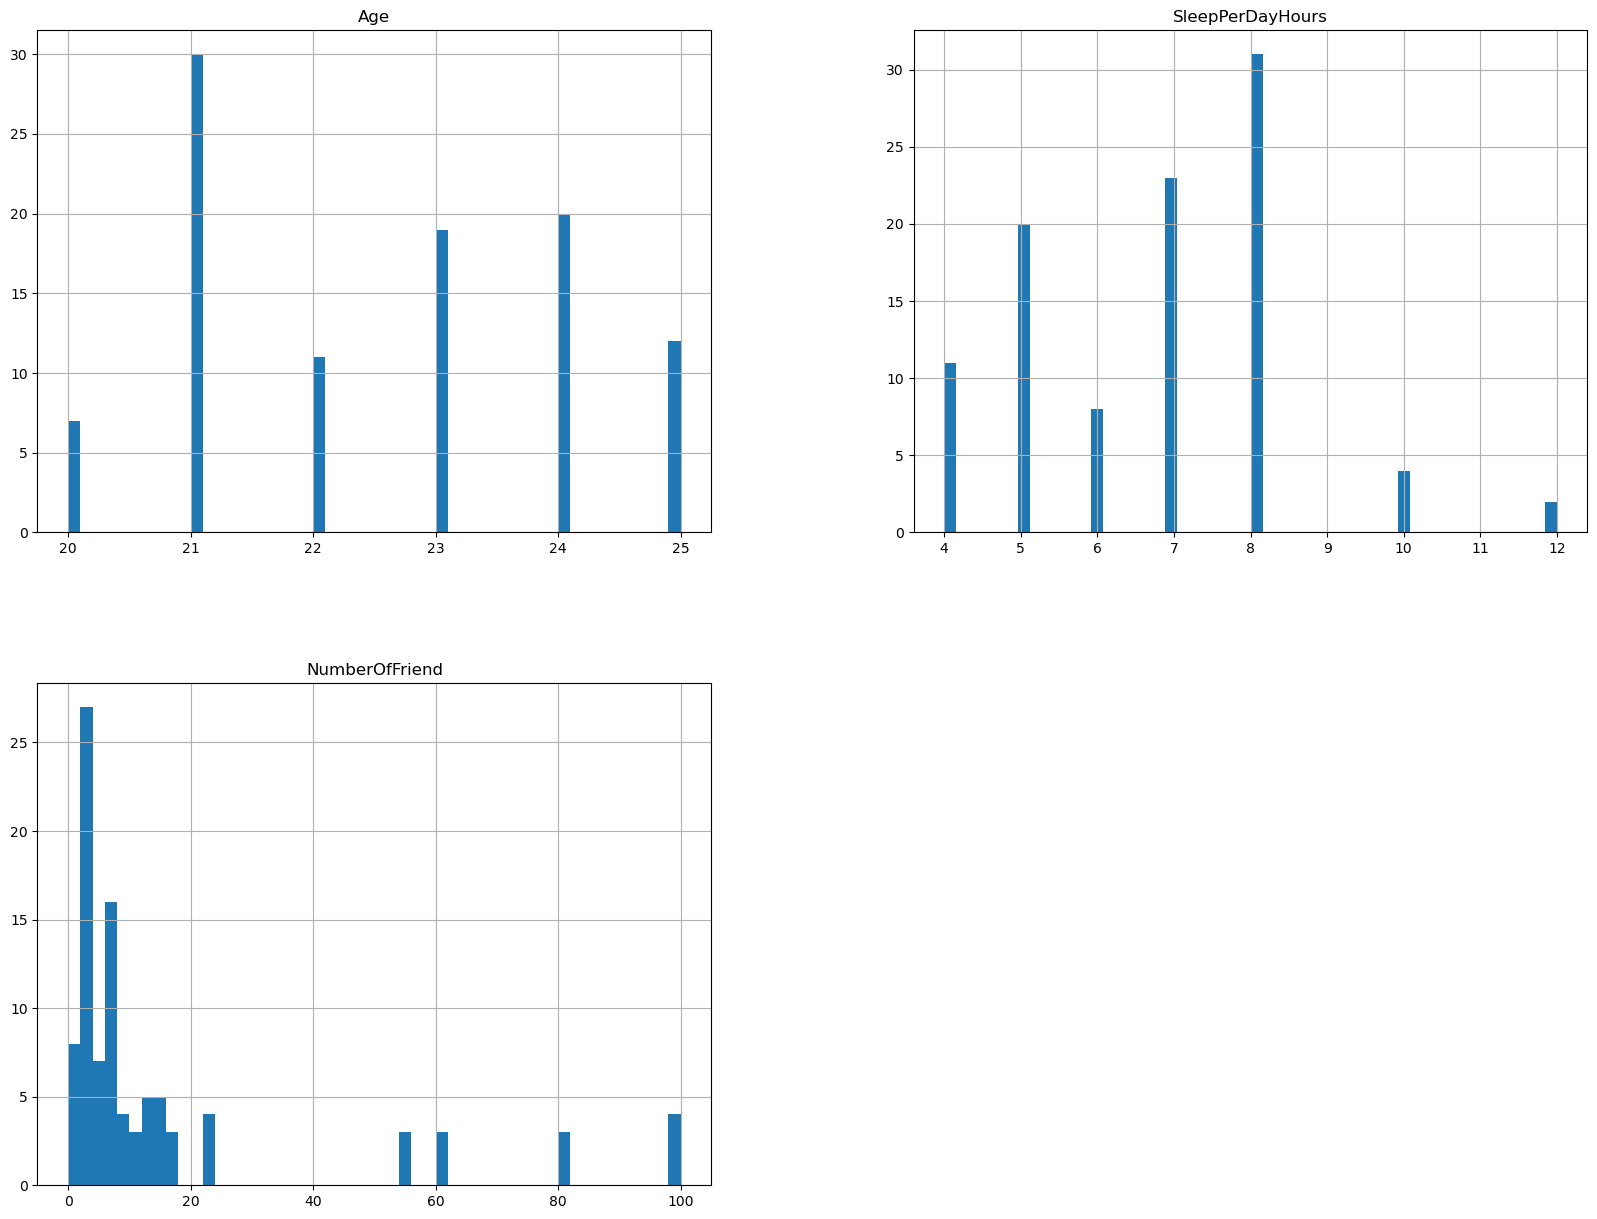

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [375]:
X = df[['Age','SleepPerDayHours','TakingNoteInClass','AcademicPerformance','Gender','FaceChallangesToCompleteAcademicTask','LikePresentation','LikeNewThings',]]
y = df[['DepressionStatus']]

In [376]:
X = pd.get_dummies(X)


In [377]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [378]:
X_train, X_test, y_train, y_test = X[:79], X[79:99], y[:79], y[79:99]

In [379]:
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

In [380]:
y_train_1

,DepressionStatus
0,False
1,False
2,False
3,False
4,False
...,...
74,False
75,False
76,False
77,False


In [381]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LogisticRegression

In [382]:
LR_X_train = X_train
LR_y_train = y_train

In [383]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(LR_X_train, LR_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [384]:
from sklearn.model_selection import cross_val_score
cross_val_score(LR, LR_X_train, LR_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

array([0.77777778, 0.88461538, 0.76923077])

# Support Vector Machines

In [385]:
SVC_X_train = X_train
SVC_y_train = y_train

In [386]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear')
SVC.fit(SVC_X_train, SVC_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [387]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC, SVC_X_train, SVC_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.85185185, 0.84615385, 0.80769231])

# RandomForestClassifier

In [397]:
RFC_X_train = X_train
RFC_y_train = y_train

In [398]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(RFC_X_train, RFC_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [399]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFC, RFC_X_train, RFC_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\programs\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\programs\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([1., 1., 1.])

# GradientBoostingClassifier

In [400]:
GBC_X_train = X_train
GBC_y_train = y_train

In [401]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(GBC_X_train, GBC_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [402]:
from sklearn.model_selection import cross_val_score
cross_val_score(GBC, GBC_X_train, GBC_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\programs\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 1., 1.])

# KNeighborsClassifier

In [403]:
KNN_X_train = X_train
KNN_y_train = y_train

In [404]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(KNN_X_train, KNN_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [405]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN, KNN_X_train, KNN_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\programs\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\programs\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "D:\programs\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\programs\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
           

array([nan, nan, nan])

In [408]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [415]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(LR_X_train, X_train, y_train_1, cv=3)

TypeError: Cannot clone object '    Age  SleepPerDayHours  TakingNoteInClass_No  TakingNoteInClass_Sometimes  \
0    23                12                  True                        False   
1    23                 8                 False                         True   
2    24                 8                  True                        False   
3    20                 5                 False                        False   
4    24                 5                 False                        False   
..  ...               ...                   ...                          ...   
74   22                 7                 False                         True   
75   24                 7                 False                        False   
76   24                 5                 False                        False   
77   21                 5                 False                        False   
78   25                 5                 False                        False   

    TakingNoteInClass_Yes  AcademicPerformance_Average  \
0                   False                         True   
1                   False                        False   
2                   False                         True   
3                    True                        False   
4                    True                         True   
..                    ...                          ...   
74                  False                        False   
75                   True                         True   
76                   True                        False   
77                   True                        False   
78                   True                         True   

    AcademicPerformance_Below average  AcademicPerformance_Excellent  \
0                               False                          False   
1                               False                           True   
2                               False                          False   
3                               False                          False   
4                               False                          False   
..                                ...                            ...   
74                              False                           True   
75                              False                          False   
76                              False                          False   
77                               True                          False   
78                              False                          False   

    AcademicPerformance_Good  Gender_Female  Gender_Male  \
0                      False          False         True   
1                      False          False         True   
2                      False          False         True   
3                       True           True        False   
4                      False           True        False   
..                       ...            ...          ...   
74                     False          False         True   
75                     False          False         True   
76                      True           True        False   
77                     False           True        False   
78                     False           True        False   

    FaceChallangesToCompleteAcademicTask_No  \
0                                     False   
1                                      True   
2                                     False   
3                                     False   
4                                     False   
..                                      ...   
74                                    False   
75                                    False   
76                                    False   
77                                    False   
78                                    False   

    FaceChallangesToCompleteAcademicTask_Sometimes  \
0                                            False   
1                                            False   
2                                             True   
3                                            False   
4                                            False   
..                                             ...   
74                                           False   
75                                            True   
76                                           False   
77                                           False   
78                                           False   

    FaceChallangesToCompleteAcademicTask_Yes  LikePresentation_No  \
0                                       True                False   
1                                      False                False   
2                                      False                 True   
3                                       True                 True   
4                                       True                False   
..                                       ...                  ...   
74                                      True                False   
75                                     False                False   
76                                      True                False   
77                                      True                 True   
78                                      True                False   

    LikePresentation_Yes  LikeNewThings_No  LikeNewThings_Yes  
0                   True             False               True  
1                   True             False               True  
2                  False             False               True  
3                  False             False               True  
4                   True             False               True  
..                   ...               ...                ...  
74                  True             False               True  
75                  True             False               True  
76                  True             False               True  
77                 False             False               True  
78                  True             False               True  

[79 rows x 18 columns]' (type <class 'pandas.core.frame.DataFrame'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.